## Menghubungkan Google Colab ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install dan Import Pustaka(library)

In [2]:
!pip install ultralytics roboflow opencv-python matplotlib roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Mengunduh Dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Jg30mLZXEt5tWEETzbxm")
project = rf.workspace("deeplearning-yuw2g").project("yolov8-wvi7o-0cptf")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolov8-2 in yolov8:: 100%|██████████| 13724/13724 [00:03<00:00, 3911.33it/s]


## Grafik Distribusi Dataset

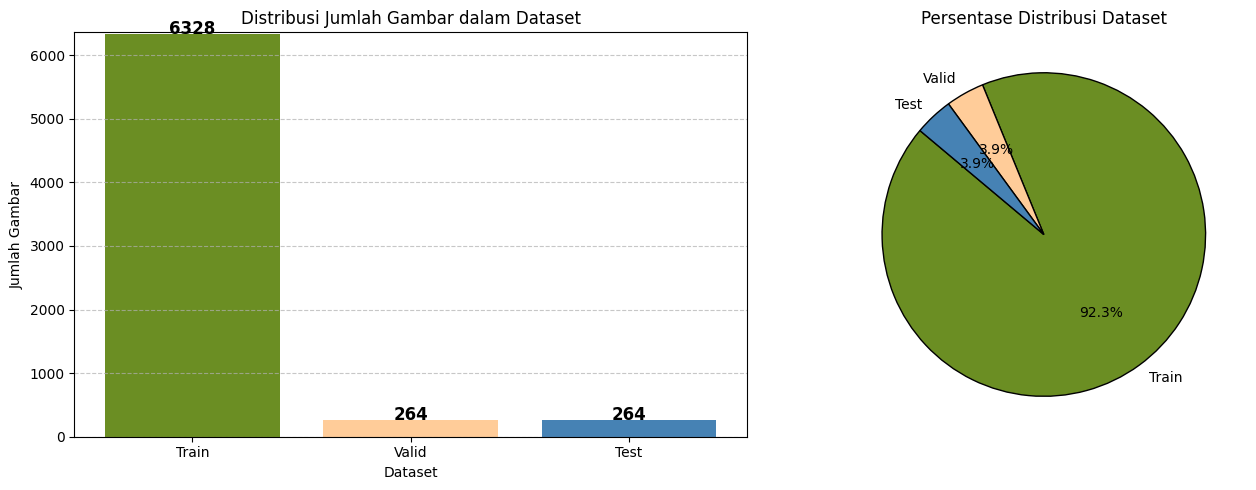

In [ ]:
DATASET_PATH = "/content/yolov8-2"
TRAIN_DIR = os.path.join(DATASET_PATH, "train/images")
VALID_DIR = os.path.join(DATASET_PATH, "valid/images")
TEST_DIR = os.path.join(DATASET_PATH, "test/images")


def count_files(directory):
    return len(os.listdir(directory)) if os.path.exists(directory) else 0


num_train = count_files(TRAIN_DIR)
num_valid = count_files(VALID_DIR)
num_test = count_files(TEST_DIR)

categories = ["Train", "Valid", "Test"]
counts = [num_train, num_valid, num_test]
colors = ["#6b8e23", "#ffcc99", "#4682b4"]


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].bar(categories, counts, color=colors)
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel("Jumlah Gambar")
axes[0].set_title("Distribusi Jumlah Gambar dalam Dataset")
axes[0].set_ylim(0, max(counts) + 30)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)


for i, v in enumerate(counts):
    axes[0].text(i, v + 2, str(v), ha="center", fontsize=12, fontweight="bold")

axes[1].pie(counts, labels=categories, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
axes[1].set_title("Persentase Distribusi Dataset")

plt.tight_layout()
plt.show()


## Visualisasi Dataset

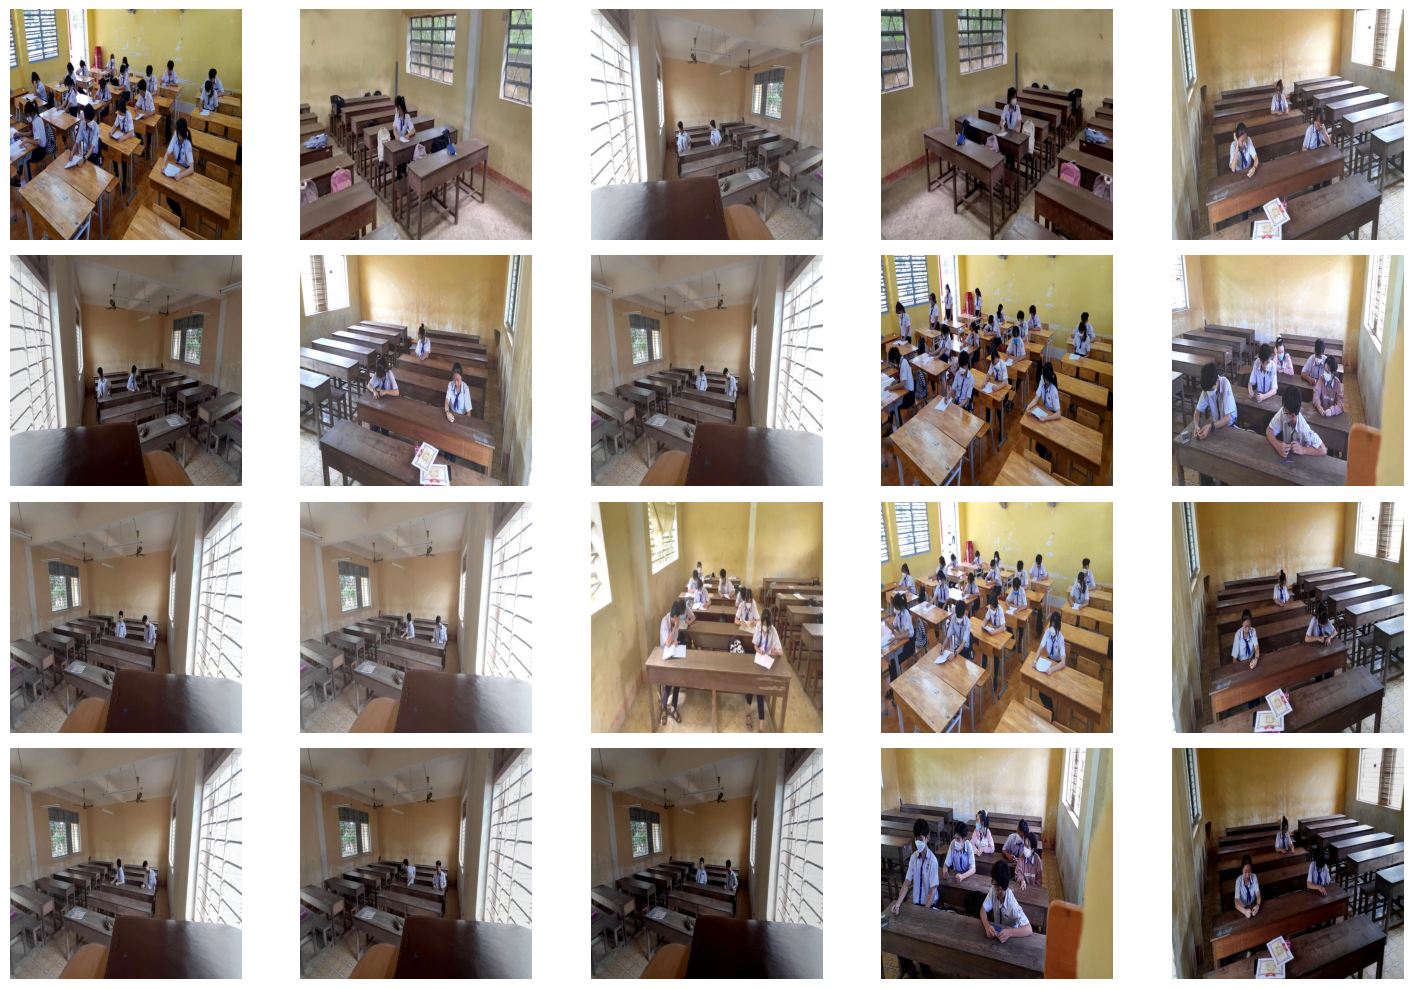

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ambil gambar dari training set
image_folder = TRAIN_DIR
if os.path.exists(image_folder):
    image_files = os.listdir(image_folder)[:20]  # Ambil 20 gambar pertama

    fig, axes = plt.subplots(4, 5, figsize=(15, 10))  # Layout 4x5
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah BGR ke RGB

        row, col = divmod(i, 5)
        axes[row, col].imshow(img)
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()
else:
    print(f"Folder {image_folder} tidak ditemukan atau kosong.")


## Training

### YOLOv8

In [ ]:
from ultralytics import YOLO

model_YoloV8s = YOLO("yolov8s.pt")

Result_yoloV8s = model_YoloV8s.train(
    data="/content/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,
    translate=0.1,
    scale=0.5,
    perspective=0.001,
    fliplr=0.0,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    erasing=0.0
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 231MB/s]


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1326.7±640.0 MB/s, size: 59.1 KB)


train: Scanning /content/yolov8-2/train/labels... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:02<00:00, 2308.68it/s]

train: New cache created: /content/yolov8-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 942.3±433.5 MB/s, size: 46.1 KB)


val: Scanning /content/yolov8-2/valid/labels... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<00:00, 1327.60it/s]

val: New cache created: /content/yolov8-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.68G      1.612      1.596      1.332         58        640: 100%|██████████| 396/396 [02:10<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        264       1524      0.825      0.831      0.865      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.47G      1.442      1.112      1.244        136        640: 100%|██████████| 396/396 [02:06<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]

                   all        264       1524      0.825      0.879      0.901      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.51G      1.393      1.007      1.222         83        640: 100%|██████████| 396/396 [02:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]

                   all        264       1524      0.841      0.873      0.905      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.54G       1.36     0.9439      1.205         68        640: 100%|██████████| 396/396 [02:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]

                   all        264       1524      0.858      0.918      0.922      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.58G      1.325     0.8921       1.19         44        640: 100%|██████████| 396/396 [02:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]

                   all        264       1524      0.897      0.905      0.937      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.62G      1.305     0.8692       1.18         63        640: 100%|██████████| 396/396 [02:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]

                   all        264       1524      0.884      0.914      0.931      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.65G      1.279     0.8358      1.165         87        640: 100%|██████████| 396/396 [02:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        264       1524      0.883      0.922      0.937      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.69G      1.258     0.8129      1.156         43        640: 100%|██████████| 396/396 [02:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]

                   all        264       1524      0.891      0.914      0.942      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.73G      1.241     0.7823      1.145        103        640: 100%|██████████| 396/396 [02:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]

                   all        264       1524      0.866      0.923       0.94      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.76G      1.232     0.7725      1.144         75        640: 100%|██████████| 396/396 [02:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        264       1524      0.915      0.923      0.952      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       4.8G      1.223     0.7544      1.137        118        640: 100%|██████████| 396/396 [02:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        264       1524      0.916      0.924      0.947      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.84G      1.202     0.7332      1.126         84        640: 100%|██████████| 396/396 [02:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        264       1524       0.91      0.924      0.947      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.87G      1.188      0.724      1.122         99        640: 100%|██████████| 396/396 [02:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]

                   all        264       1524      0.918      0.914      0.946      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.91G      1.181     0.7189      1.117         63        640: 100%|██████████| 396/396 [02:08<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]

                   all        264       1524      0.915      0.935      0.947       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.95G      1.176     0.6993      1.113         58        640: 100%|██████████| 396/396 [02:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]

                   all        264       1524      0.912      0.931      0.947      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.98G      1.164     0.6895      1.109        104        640: 100%|██████████| 396/396 [02:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        264       1524      0.903      0.934      0.951      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.02G       1.15     0.6848      1.106        101        640: 100%|██████████| 396/396 [02:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        264       1524      0.925      0.924      0.953      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.05G      1.153     0.6784      1.108        106        640: 100%|██████████| 396/396 [02:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]

                   all        264       1524      0.915      0.925      0.951      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.09G      1.134      0.663      1.097         92        640: 100%|██████████| 396/396 [02:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        264       1524      0.927      0.921      0.953      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.13G       1.13     0.6553      1.096         53        640: 100%|██████████| 396/396 [02:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        264       1524      0.936      0.918      0.957      0.648


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.16G      1.054     0.5127      1.107         62        640: 100%|██████████| 396/396 [01:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        264       1524      0.929      0.928      0.955      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       5.2G      1.029     0.4935      1.092         44        640: 100%|██████████| 396/396 [01:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        264       1524      0.927      0.922      0.955       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.24G       1.02     0.4844      1.088         39        640: 100%|██████████| 396/396 [01:51<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        264       1524      0.935      0.926      0.953      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.27G      1.002      0.469      1.082         49        640: 100%|██████████| 396/396 [01:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        264       1524      0.928      0.928      0.953      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.31G     0.9867      0.459      1.073         55        640: 100%|██████████| 396/396 [01:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]

                   all        264       1524      0.937      0.918      0.955       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.35G     0.9806     0.4491      1.068         41        640: 100%|██████████| 396/396 [01:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]

                   all        264       1524      0.933      0.936      0.958      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.38G     0.9655     0.4405      1.061         47        640: 100%|██████████| 396/396 [01:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        264       1524      0.932      0.936      0.959      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.42G     0.9578     0.4341      1.056         41        640: 100%|██████████| 396/396 [01:53<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        264       1524      0.946      0.924       0.96      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.46G     0.9439     0.4226      1.052         45        640: 100%|██████████| 396/396 [01:56<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]

                   all        264       1524      0.937      0.937       0.96      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.81G     0.9339     0.4179      1.044         36        640: 100%|██████████| 396/396 [01:54<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]

                   all        264       1524      0.945      0.925      0.957      0.663



30 epochs completed in 1.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


                   all        264       1524      0.946      0.924       0.96      0.664
    Bend Over The Desk        137        213      0.935      0.882      0.951      0.628
      Hand Under Table        143        278      0.949      0.938      0.956      0.532
           Look Around        168        311       0.93      0.899      0.953      0.612
                Normal        125        499      0.937      0.934      0.964        0.8
              Stand Up         31         93      0.994          1      0.995      0.841
                  Wave         72        130      0.931      0.892      0.939      0.572
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!zip -r runs.zip runs
from google.colab import files
files.download("runs.zip")


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/P_curve.png (deflated 10%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 22%)
  adding: runs/detect/train/labels.jpg (deflated 28%)
  adding: runs/detect/train/confusion_matrix.png (deflated 24%)
  adding: runs/detect/train/args.yaml (deflated 53%)
  adding: runs/detect/train/results.png (deflated 8%)
  adding: runs/detect/train/R_curve.png (deflated 9%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/results.csv (deflated 60%)
  adding: runs/detect/train/val_batch2_pred.jpg (deflated 5%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 29%)
  adding: runs/detect/train/train_batch7920.jpg (deflated 5%)
  adding: runs/detect/train/F1_curve.png (deflated 8%)
  adding: runs/detect/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### YOLOV9


In [ ]:
from ultralytics import YOLO

model_Yolov9s= YOLO("yolov9s.pt")

Result_yoloV9s=model_Yolov9s.train(
    data="/content/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,
    translate=0.1,
    scale=0.5,
    perspective=0.001,
    fliplr=0.0,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    erasing=0.0
)


100%|██████████| 14.7M/14.7M [00:00<00:00, 113MB/s] 


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

train: Scanning /content/yolov8-2/train/labels.cache... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 934.8±511.4 MB/s, size: 46.1 KB)


val: Scanning /content/yolov8-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.27G      1.606      1.522      1.371         58        640: 100%|██████████| 396/396 [03:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        264       1524      0.798      0.845      0.868      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.02G      1.444      1.092      1.272        136        640: 100%|██████████| 396/396 [02:57<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        264       1524      0.821      0.867      0.892       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.02G      1.404     0.9941       1.25         83        640: 100%|██████████| 396/396 [02:51<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        264       1524      0.859      0.876      0.909      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.02G      1.378     0.9371      1.239         68        640: 100%|██████████| 396/396 [02:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        264       1524      0.866      0.909      0.925      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.02G      1.338     0.8877      1.227         44        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        264       1524      0.873      0.906      0.925      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.02G      1.319     0.8633      1.214         63        640: 100%|██████████| 396/396 [02:50<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        264       1524      0.893      0.896      0.927       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.02G      1.297     0.8283      1.199         87        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        264       1524      0.873      0.922      0.928      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.02G      1.274     0.8042      1.188         43        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        264       1524      0.887      0.915      0.934      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.02G      1.255      0.773      1.183        103        640: 100%|██████████| 396/396 [02:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        264       1524      0.904      0.907      0.933      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.02G      1.243     0.7579      1.179         75        640: 100%|██████████| 396/396 [02:49<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        264       1524      0.896      0.924      0.939      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.02G      1.238      0.745      1.175        118        640: 100%|██████████| 396/396 [02:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        264       1524      0.894      0.926      0.936      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.02G      1.213     0.7224      1.156         84        640: 100%|██████████| 396/396 [02:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]


                   all        264       1524      0.895      0.926      0.939      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.02G      1.201     0.7113       1.16         99        640: 100%|██████████| 396/396 [02:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        264       1524      0.893      0.922      0.937      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.02G      1.189     0.7105      1.154         63        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        264       1524      0.912       0.92      0.944      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.02G      1.189     0.6921      1.149         58        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        264       1524      0.917      0.926       0.95      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.02G      1.177     0.6822      1.145        104        640: 100%|██████████| 396/396 [02:48<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        264       1524        0.9      0.924      0.941      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.02G      1.165     0.6739      1.136        101        640: 100%|██████████| 396/396 [02:48<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        264       1524      0.922      0.922      0.948      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.02G      1.164      0.669      1.139        106        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        264       1524      0.915      0.922      0.948      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.02G      1.147     0.6555      1.132         92        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        264       1524      0.908      0.935      0.949      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.02G      1.143     0.6458       1.13         53        640: 100%|██████████| 396/396 [02:48<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        264       1524      0.915      0.924       0.95      0.641


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.02G      1.066     0.4999      1.143         62        640: 100%|██████████| 396/396 [02:43<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        264       1524      0.919      0.923      0.949       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.02G      1.046     0.4842      1.132         44        640: 100%|██████████| 396/396 [02:39<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        264       1524      0.912      0.926      0.947      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.02G      1.035     0.4763      1.128         39        640: 100%|██████████| 396/396 [02:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        264       1524      0.919      0.923      0.948      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.02G      1.017     0.4602      1.115         49        640: 100%|██████████| 396/396 [02:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        264       1524      0.923      0.917      0.949      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.02G      1.006     0.4491      1.104         55        640: 100%|██████████| 396/396 [02:41<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        264       1524      0.914      0.933      0.949      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.02G      0.996     0.4395      1.099         41        640: 100%|██████████| 396/396 [02:44<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        264       1524       0.92      0.933      0.949      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.02G     0.9828     0.4307      1.092         47        640: 100%|██████████| 396/396 [02:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        264       1524      0.936       0.91      0.948      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.02G     0.9759     0.4234      1.086         41        640: 100%|██████████| 396/396 [02:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        264       1524      0.938      0.916      0.949      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.02G     0.9629     0.4106      1.084         45        640: 100%|██████████| 396/396 [02:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        264       1524      0.921      0.933       0.95      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.02G       0.95     0.4065      1.073         36        640: 100%|██████████| 396/396 [02:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]

                   all        264       1524      0.933      0.919      0.951      0.667



30 epochs completed in 1.436 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 15.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,169,410 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]


                   all        264       1524      0.933      0.919      0.951      0.667
    Bend Over The Desk        137        213      0.883       0.85      0.935      0.628
      Hand Under Table        143        278      0.932      0.935      0.938       0.51
           Look Around        168        311      0.926      0.907      0.948      0.615
                Normal        125        499      0.936       0.94      0.968      0.808
              Stand Up         31         93      0.996          1      0.995      0.854
                  Wave         72        130      0.927      0.883       0.92      0.584
Speed: 0.2ms preprocess, 6.9ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
!zip -r runs.zip runs
from google.colab import files
files.download("runs.zip")


updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/train/ (stored 0%)
updating: runs/detect/train/P_curve.png (deflated 10%)
updating: runs/detect/train/confusion_matrix_normalized.png (deflated 22%)
updating: runs/detect/train/labels.jpg (deflated 28%)
updating: runs/detect/train/confusion_matrix.png (deflated 24%)
updating: runs/detect/train/args.yaml (deflated 53%)
updating: runs/detect/train/results.png (deflated 8%)
updating: runs/detect/train/R_curve.png (deflated 9%)
updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 8%)
updating: runs/detect/train/weights/best.pt (deflated 8%)
updating: runs/detect/train/results.csv (deflated 60%)
updating: runs/detect/train/val_batch2_pred.jpg (deflated 5%)
updating: runs/detect/train/labels_correlogram.jpg (deflated 29%)
updating: runs/detect/train/train_batch7920.jpg (deflated 5%)
updating: runs/detect/train/F1_curve.png (deflated 8%)
updating: runs/detect/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### YOLOV10


In [5]:
from ultralytics import YOLO

model_Yolov10s= YOLO("yolov10s.pt")

Result_yoloV10s=model_Yolov10s.train(
    data="/content/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,
    translate=0.1,
    scale=0.5,
    perspective=0.001,
    fliplr=0.0,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    erasing=0.0
)


100%|██████████| 15.9M/15.9M [00:00<00:00, 56.9MB/s]


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 124MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 975.0±447.6 MB/s, size: 59.1 KB)


train: Scanning /content/yolov8-2/train/labels... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:03<00:00, 2062.17it/s]


train: New cache created: /content/yolov8-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1163.4±756.8 MB/s, size: 46.1 KB)


val: Scanning /content/yolov8-2/valid/labels... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<00:00, 1169.39it/s]

val: New cache created: /content/yolov8-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.07G      3.331       3.41      2.669         58        640: 100%|██████████| 396/396 [02:47<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.27it/s]

                   all        264       1524      0.774      0.799      0.832      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.88G      3.071      2.366      2.518        136        640: 100%|██████████| 396/396 [02:38<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]


                   all        264       1524      0.841      0.824      0.874      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.92G      3.001      2.182      2.485         83        640: 100%|██████████| 396/396 [02:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        264       1524      0.835      0.851      0.891      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.97G      2.937      2.054      2.452         68        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]

                   all        264       1524      0.858      0.865      0.913      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.01G      2.833      1.932      2.412         44        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]

                   all        264       1524      0.864       0.89      0.923      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.06G      2.807      1.851      2.391         63        640: 100%|██████████| 396/396 [02:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        264       1524      0.878        0.9      0.926      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       6.1G      2.742      1.785      2.361         87        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]

                   all        264       1524      0.862      0.912      0.924        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.15G      2.695      1.717      2.339         43        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        264       1524      0.868      0.916      0.935      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.19G      2.646      1.643      2.313        103        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        264       1524      0.882      0.904       0.93      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.24G      2.616      1.623      2.306         75        640: 100%|██████████| 396/396 [02:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]

                   all        264       1524        0.9       0.91      0.937      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.29G      2.605      1.591      2.294        118        640: 100%|██████████| 396/396 [02:35<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        264       1524      0.888      0.912      0.941      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.33G      2.541       1.53      2.265         84        640: 100%|██████████| 396/396 [02:35<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        264       1524      0.876      0.917      0.937      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.38G      2.521      1.513      2.267         99        640: 100%|██████████| 396/396 [02:35<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]

                   all        264       1524      0.891      0.918      0.946      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.42G      2.496       1.49      2.249         63        640: 100%|██████████| 396/396 [02:34<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        264       1524      0.884      0.918      0.944      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.47G      2.486      1.456      2.243         58        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        264       1524      0.889      0.925      0.945      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.51G      2.459      1.432      2.236        104        640: 100%|██████████| 396/396 [02:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        264       1524      0.882      0.917      0.946      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.56G      2.425      1.417      2.227        101        640: 100%|██████████| 396/396 [02:33<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        264       1524       0.92      0.916      0.948      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       6.6G      2.426      1.392       2.23        106        640: 100%|██████████| 396/396 [02:32<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]

                   all        264       1524      0.884      0.924      0.946      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.65G      2.398      1.366      2.212         92        640: 100%|██████████| 396/396 [02:33<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]

                   all        264       1524      0.916      0.909      0.946      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.69G      2.382      1.351      2.206         53        640: 100%|██████████| 396/396 [02:34<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        264       1524      0.886      0.928      0.948       0.64


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.74G      2.162     0.9501      2.232         62        640: 100%|██████████| 396/396 [02:39<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        264       1524      0.902      0.928      0.946      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.79G      2.112       0.91      2.197         44        640: 100%|██████████| 396/396 [02:29<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        264       1524      0.903      0.914      0.946      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.83G      2.089      0.896       2.19         39        640: 100%|██████████| 396/396 [02:26<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]

                   all        264       1524      0.915      0.926       0.95       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.88G      2.052      0.861       2.18         49        640: 100%|██████████| 396/396 [02:26<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

                   all        264       1524      0.907      0.919      0.945      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.92G      2.028     0.8416      2.166         55        640: 100%|██████████| 396/396 [02:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]

                   all        264       1524      0.915      0.927      0.948      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.97G      2.006     0.8259      2.148         41        640: 100%|██████████| 396/396 [02:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        264       1524      0.912      0.927       0.95      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.01G       1.98     0.8088      2.137         47        640: 100%|██████████| 396/396 [02:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        264       1524       0.92      0.923       0.95      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.06G      1.961     0.7995      2.123         41        640: 100%|██████████| 396/396 [02:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        264       1524      0.915       0.94      0.949      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       7.1G      1.932     0.7731      2.115         45        640: 100%|██████████| 396/396 [02:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]

                   all        264       1524      0.926      0.928       0.95      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.15G      1.906     0.7687      2.099         36        640: 100%|██████████| 396/396 [02:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        264       1524      0.914      0.935      0.951      0.666



30 epochs completed in 1.308 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,220,322 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


                   all        264       1524      0.915      0.936      0.951      0.666
    Bend Over The Desk        137        213      0.909      0.896      0.937      0.623
      Hand Under Table        143        278      0.907      0.947      0.946      0.524
           Look Around        168        311      0.921       0.92      0.946      0.617
                Normal        125        499      0.894      0.954      0.969      0.811
              Stand Up         31         93      0.993          1      0.995      0.846
                  Wave         72        130      0.866      0.898      0.912      0.575
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train


In [14]:
!zip -r runs.zip runs
from google.colab import files
files.download("runs.zip")


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/P_curve.png (deflated 11%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 22%)
  adding: runs/detect/train/labels.jpg (deflated 28%)
  adding: runs/detect/train/confusion_matrix.png (deflated 24%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train/results.png (deflated 8%)
  adding: runs/detect/train/R_curve.png (deflated 9%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/results.csv (deflated 58%)
  adding: runs/detect/train/val_batch2_pred.jpg (deflated 5%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 29%)
  adding: runs/detect/train/train_batch7920.jpg (deflated 5%)
  adding: runs/detect/train/F1_curve.png (deflated 8%)
  adding: runs/detect/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### YOLOV11


In [15]:
from ultralytics import YOLO

model_Yolov11s= YOLO("yolo11s.pt")

Result_yoloV11s=model_Yolov11s.train(
    data="/content/yolov8-2/data.yaml",
    epochs=30,
    batch=16,
    lr0=0.001,
    optimizer="AdamW",
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,
    translate=0.1,
    scale=0.5,
    perspective=0.001,
    fliplr=0.0,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    erasing=0.0
)


100%|██████████| 18.4M/18.4M [00:00<00:00, 68.4MB/s]

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/yolov8-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    443776  ultralytics.nn.modules.block.C3k2            [768, 256, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    127680  ultralytics.nn.modules.block.C3k2            [512,

train: Scanning /content/yolov8-2/train/labels.cache... 6328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6328/6328 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 769.8±527.0 MB/s, size: 46.1 KB)


val: Scanning /content/yolov8-2/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.55G        1.6      1.528      1.339         58        640: 100%|██████████| 396/396 [02:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]


                   all        264       1524      0.836       0.78      0.855      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.31G      1.449      1.114      1.254        136        640: 100%|██████████| 396/396 [02:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        264       1524      0.821      0.877      0.894      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.31G      1.406      1.034       1.23         83        640: 100%|██████████| 396/396 [02:16<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        264       1524      0.868      0.881      0.918      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.31G      1.379     0.9721      1.215         68        640: 100%|██████████| 396/396 [02:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        264       1524      0.854      0.905      0.915      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.31G      1.339     0.9226        1.2         44        640: 100%|██████████| 396/396 [02:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        264       1524      0.892      0.884       0.93      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.31G      1.323     0.8924      1.189         63        640: 100%|██████████| 396/396 [02:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        264       1524      0.891      0.901      0.924      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.31G      1.299     0.8645      1.177         87        640: 100%|██████████| 396/396 [02:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        264       1524      0.864      0.913      0.933      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.31G      1.275     0.8392      1.165         43        640: 100%|██████████| 396/396 [02:12<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]

                   all        264       1524      0.876      0.919      0.936        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.31G      1.251     0.8054      1.152        103        640: 100%|██████████| 396/396 [02:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        264       1524      0.894      0.917       0.94      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.31G      1.243     0.7952      1.151         75        640: 100%|██████████| 396/396 [02:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]

                   all        264       1524      0.908      0.911      0.948      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.31G      1.233     0.7792      1.145        118        640: 100%|██████████| 396/396 [02:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        264       1524      0.884      0.929      0.944       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.31G      1.207     0.7557      1.131         84        640: 100%|██████████| 396/396 [02:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        264       1524      0.892      0.924      0.942      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.31G      1.202      0.749      1.131         99        640: 100%|██████████| 396/396 [02:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]

                   all        264       1524      0.895      0.938      0.949      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.31G      1.195     0.7417      1.125         63        640: 100%|██████████| 396/396 [02:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]


                   all        264       1524      0.902       0.93      0.951      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.31G      1.186     0.7227      1.119         58        640: 100%|██████████| 396/396 [02:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        264       1524      0.885      0.947      0.952      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.31G      1.176     0.7143      1.118        104        640: 100%|██████████| 396/396 [02:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        264       1524        0.9      0.924      0.948      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.32G      1.162     0.7085      1.113        101        640: 100%|██████████| 396/396 [02:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]

                   all        264       1524      0.913      0.929      0.956      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.32G       1.16     0.7012      1.114        106        640: 100%|██████████| 396/396 [02:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.60it/s]

                   all        264       1524      0.897      0.933      0.951      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.32G      1.147     0.6872      1.105         92        640: 100%|██████████| 396/396 [02:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        264       1524      0.906      0.934      0.952      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.32G      1.138     0.6764      1.102         53        640: 100%|██████████| 396/396 [02:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        264       1524      0.917       0.92      0.953      0.636


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.32G      1.066      0.532      1.117         62        640: 100%|██████████| 396/396 [01:59<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        264       1524      0.911      0.936      0.956      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.32G      1.044     0.5169      1.103         44        640: 100%|██████████| 396/396 [01:57<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]

                   all        264       1524      0.925      0.921      0.954       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.32G      1.035     0.5059      1.097         39        640: 100%|██████████| 396/396 [01:58<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]


                   all        264       1524      0.914      0.927      0.954       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.32G      1.017     0.4918      1.093         49        640: 100%|██████████| 396/396 [01:57<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]

                   all        264       1524      0.922      0.922      0.951      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.32G      1.005     0.4819      1.086         55        640: 100%|██████████| 396/396 [01:59<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        264       1524        0.9      0.946      0.956      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.32G     0.9972     0.4714      1.078         41        640: 100%|██████████| 396/396 [01:59<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]

                   all        264       1524      0.912      0.935      0.953      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.32G     0.9844     0.4642      1.072         47        640: 100%|██████████| 396/396 [01:57<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        264       1524      0.901      0.945      0.954      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.32G     0.9772     0.4568      1.067         41        640: 100%|██████████| 396/396 [02:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all        264       1524       0.91      0.944      0.955      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.32G     0.9636     0.4444      1.063         45        640: 100%|██████████| 396/396 [01:59<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        264       1524      0.912      0.944      0.956      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.32G     0.9534     0.4404      1.056         36        640: 100%|██████████| 396/396 [01:58<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]

                   all        264       1524      0.912      0.943      0.956      0.663



30 epochs completed in 1.100 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 19.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]


                   all        264       1524      0.912      0.943      0.956      0.663
    Bend Over The Desk        137        213      0.902      0.911       0.95      0.631
      Hand Under Table        143        278      0.927      0.959      0.949       0.52
           Look Around        168        311      0.887      0.911      0.939      0.608
                Normal        125        499      0.905      0.954      0.965      0.804
              Stand Up         31         93      0.994          1      0.995      0.839
                  Wave         72        130      0.857      0.925      0.938      0.577
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train2


In [16]:
!zip -r runs.zip runs
from google.colab import files
files.download("runs.zip")

updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/train/ (stored 0%)
updating: runs/detect/train/P_curve.png (deflated 11%)
updating: runs/detect/train/confusion_matrix_normalized.png (deflated 22%)
updating: runs/detect/train/labels.jpg (deflated 28%)
updating: runs/detect/train/confusion_matrix.png (deflated 24%)
updating: runs/detect/train/args.yaml (deflated 52%)
updating: runs/detect/train/results.png (deflated 8%)
updating: runs/detect/train/R_curve.png (deflated 9%)
updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 8%)
updating: runs/detect/train/weights/best.pt (deflated 8%)
updating: runs/detect/train/results.csv (deflated 58%)
updating: runs/detect/train/val_batch2_pred.jpg (deflated 5%)
updating: runs/detect/train/labels_correlogram.jpg (deflated 29%)
updating: runs/detect/train/train_batch7920.jpg (deflated 5%)
updating: runs/detect/train/F1_curve.png (deflated 8%)
updating: runs/detect/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Membandingkan Metrik Evaluasi

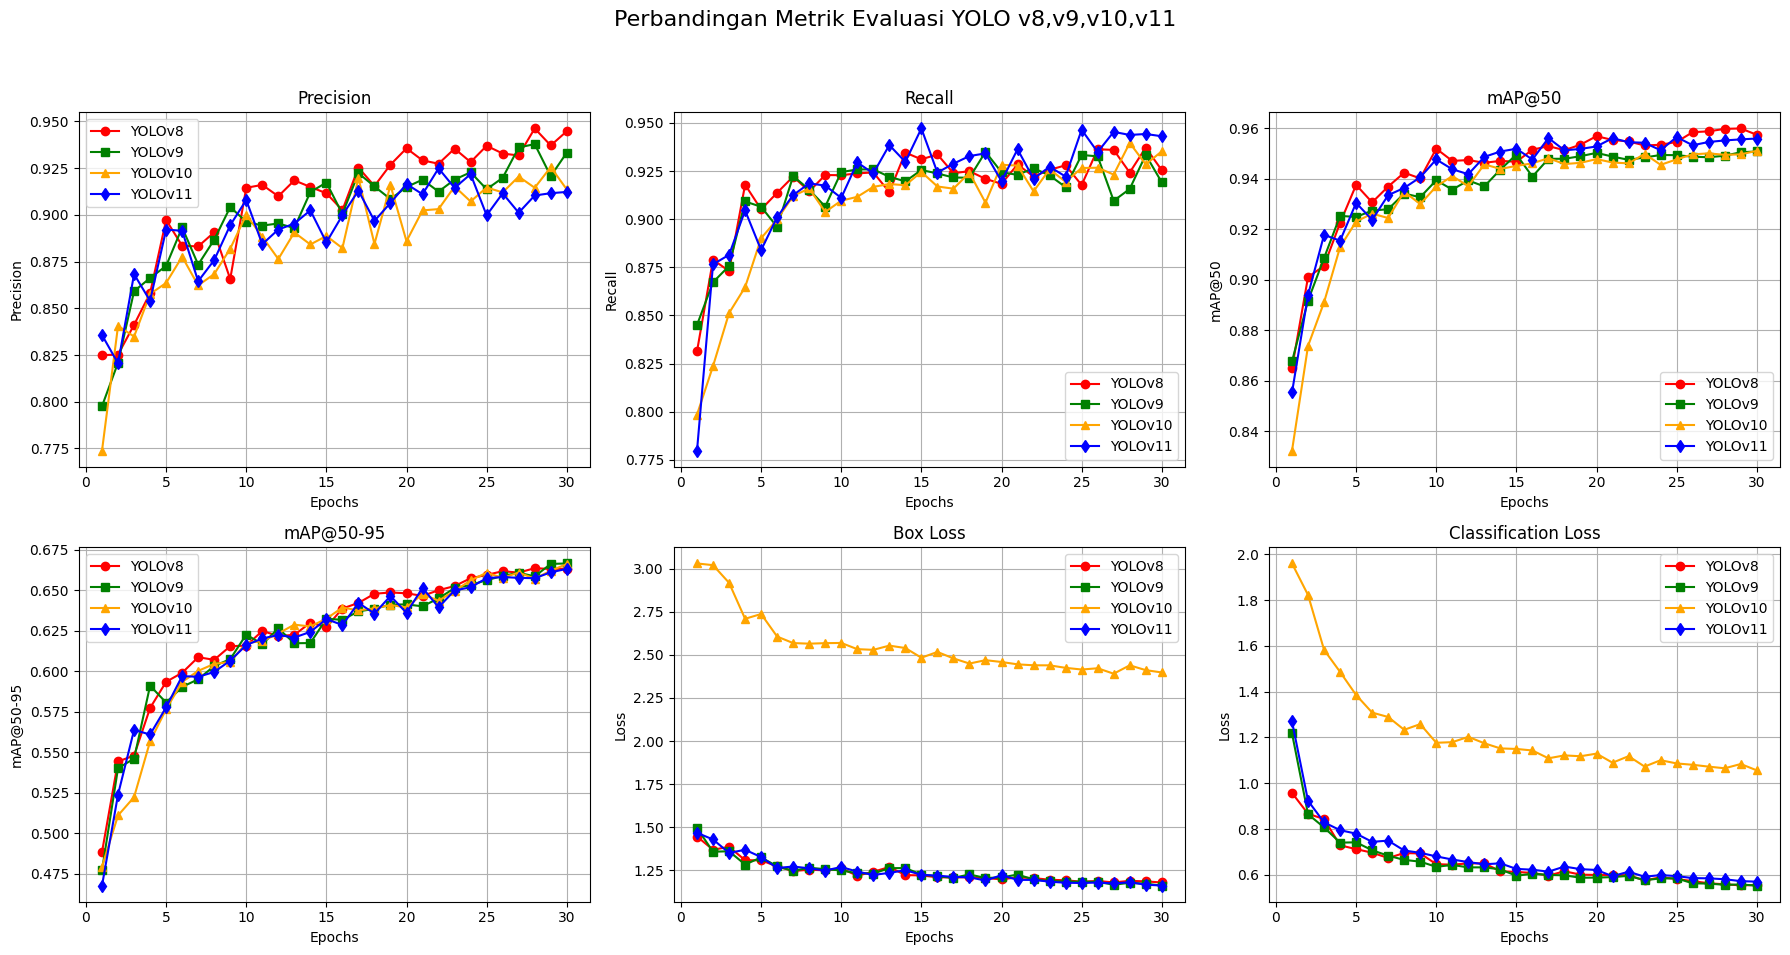

In [21]:
df_yolov8 = pd.read_csv('/content/drive/MyDrive/detect/yolov8/results.csv')
df_yolov9 = pd.read_csv('/content/drive/MyDrive/detect/yolov9/results.csv')
df_yolov10 = pd.read_csv('/content/drive/MyDrive/detect/yolov10/results.csv')
df_yolov11 = pd.read_csv('/content/runs/detect/train2/results.csv')


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Perbandingan Metrik Evaluasi YOLO v8,v9,v10,v11", fontsize=16)


axes[0, 0].plot(df_yolov8['epoch'], df_yolov8['metrics/precision(B)'], marker='o', label="YOLOv8", color='red')
axes[0, 0].plot(df_yolov9['epoch'], df_yolov9['metrics/precision(B)'], marker='s', label="YOLOv9", color='green')
axes[0, 0].plot(df_yolov10['epoch'], df_yolov10['metrics/precision(B)'], marker='^', label="YOLOv10", color='orange')
axes[0, 0].plot(df_yolov11['epoch'], df_yolov11['metrics/precision(B)'], marker='d', label="YOLOv11", color='blue')
axes[0, 0].set_title("Precision")
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].legend()
axes[0, 0].grid(True)


axes[0, 1].plot(df_yolov8['epoch'], df_yolov8['metrics/recall(B)'], marker='o', label="YOLOv8", color='red')
axes[0, 1].plot(df_yolov9['epoch'], df_yolov9['metrics/recall(B)'], marker='s', label="YOLOv9", color='green')
axes[0, 1].plot(df_yolov10['epoch'], df_yolov10['metrics/recall(B)'], marker='^', label="YOLOv10", color='orange')
axes[0, 1].plot(df_yolov11['epoch'], df_yolov11['metrics/recall(B)'], marker='d', label="YOLOv11", color='blue')
axes[0, 1].set_title("Recall")
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Recall")
axes[0, 1].legend()
axes[0, 1].grid(True)


axes[0, 2].plot(df_yolov8['epoch'], df_yolov8['metrics/mAP50(B)'], marker='o', label="YOLOv8", color='red')
axes[0, 2].plot(df_yolov9['epoch'], df_yolov9['metrics/mAP50(B)'], marker='s', label="YOLOv9", color='green')
axes[0, 2].plot(df_yolov10['epoch'], df_yolov10['metrics/mAP50(B)'], marker='^', label="YOLOv10", color='orange')
axes[0, 2].plot(df_yolov11['epoch'], df_yolov11['metrics/mAP50(B)'], marker='d', label="YOLOv11", color='blue')
axes[0, 2].set_title("mAP@50")
axes[0, 2].set_xlabel("Epochs")
axes[0, 2].set_ylabel("mAP@50")
axes[0, 2].legend()
axes[0, 2].grid(True)

axes[1, 0].plot(df_yolov8['epoch'], df_yolov8['metrics/mAP50-95(B)'], marker='o', label="YOLOv8", color='red')
axes[1, 0].plot(df_yolov9['epoch'], df_yolov9['metrics/mAP50-95(B)'], marker='s', label="YOLOv9", color='green')
axes[1, 0].plot(df_yolov10['epoch'], df_yolov10['metrics/mAP50-95(B)'], marker='^', label="YOLOv10", color='orange')
axes[1, 0].plot(df_yolov11['epoch'], df_yolov11['metrics/mAP50-95(B)'], marker='d', label="YOLOv11", color='blue')
axes[1, 0].set_title("mAP@50-95")
axes[1, 0].set_xlabel("Epochs")
axes[1, 0].set_ylabel("mAP@50-95")
axes[1, 0].legend()
axes[1, 0].grid(True)


axes[1, 1].plot(df_yolov8['epoch'], df_yolov8['val/box_loss'], marker='o', label="YOLOv8", color='red')
axes[1, 1].plot(df_yolov9['epoch'], df_yolov9['val/box_loss'], marker='s', label="YOLOv9", color='green')
axes[1, 1].plot(df_yolov10['epoch'], df_yolov10['val/box_loss'], marker='^', label="YOLOv10", color='orange')
axes[1, 1].plot(df_yolov11['epoch'], df_yolov11['val/box_loss'], marker='d', label="YOLOv11", color='blue')
axes[1, 1].set_title("Box Loss")
axes[1, 1].set_xlabel("Epochs")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()
axes[1, 1].grid(True)

axes[1, 2].plot(df_yolov8['epoch'], df_yolov8['val/cls_loss'], marker='o', label="YOLOv8", color='red')
axes[1, 2].plot(df_yolov9['epoch'], df_yolov9['val/cls_loss'], marker='s', label="YOLOv9", color='green')
axes[1, 2].plot(df_yolov10['epoch'], df_yolov10['val/cls_loss'], marker='^', label="YOLOv10", color='orange')
axes[1, 2].plot(df_yolov11['epoch'], df_yolov11['val/cls_loss'], marker='d', label="YOLOv11", color='blue')
axes[1, 2].set_title("Classification Loss")
axes[1, 2].set_xlabel("Epochs")
axes[1, 2].set_ylabel("Loss")
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Testing


image 1/1 /content/drive/MyDrive/Deep Learning/yolov8-2/test/images/10842_png.rf.aa707cc4ae072c6725adb9995ba36e1c.jpg: 640x640 5 Hand Under Tables, 1 Look Around, 7 Normals, 15.7ms
Speed: 2.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


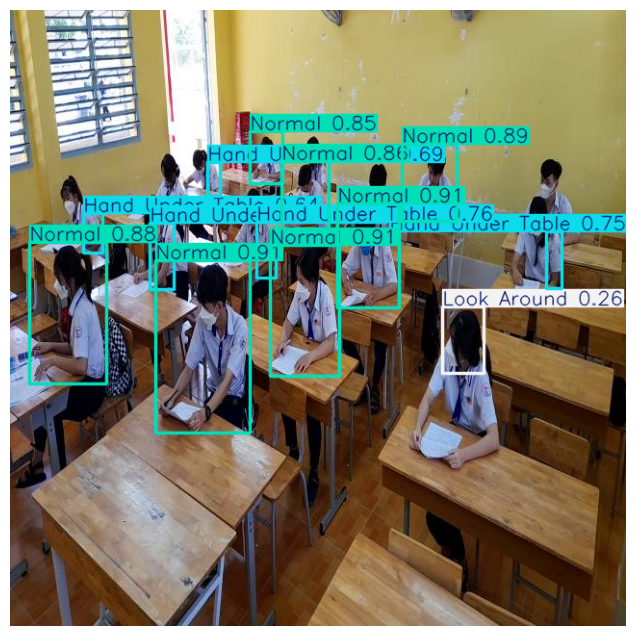

In [17]:
image_path = "/content/drive/MyDrive/Deep Learning/yolov8-2/test/images/10842_png.rf.aa707cc4ae072c6725adb9995ba36e1c.jpg"

model = YOLO("/content/runs/detect/train2/weights/best.pt")
results = model(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 21.47.07.png: 640x640 6 Look Arounds, 1 Wave, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


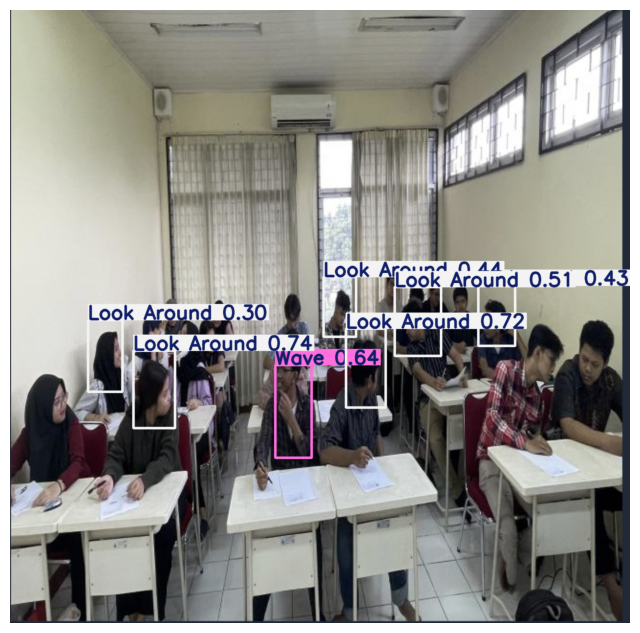

In [25]:
image_path = "/content/Screenshot 2025-04-19 at 21.47.07.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 21.48.03.png: 640x640 1 Hand Under Table, 4 Look Arounds, 2 Normals, 15.3ms
Speed: 3.3ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


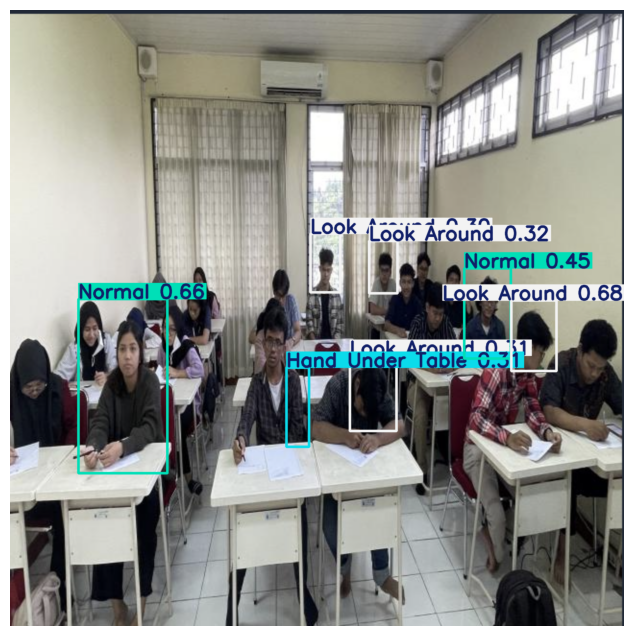

In [26]:
image_path = "/content/Screenshot 2025-04-19 at 21.48.03.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 21.49.16.png: 640x640 5 Look Arounds, 1 Stand Up, 4 Waves, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


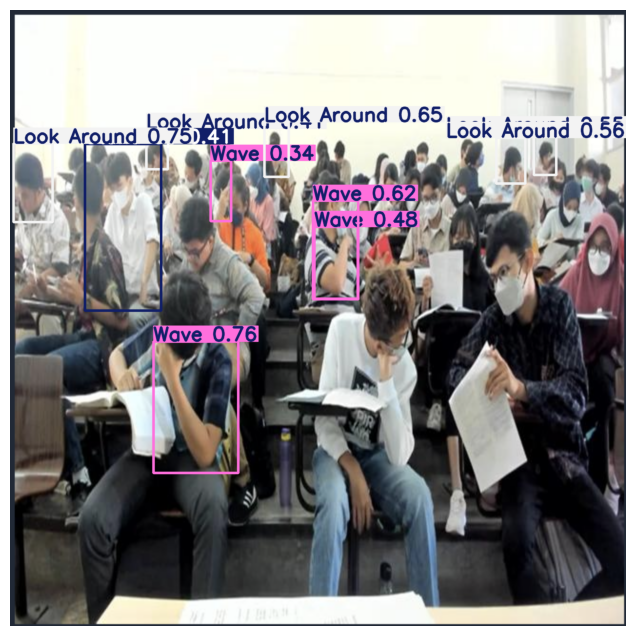

In [27]:
image_path = "/content/Screenshot 2025-04-19 at 21.49.16.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 21.53.41.png: 384x640 2 Look Arounds, 1 Normal, 12.2ms
Speed: 2.3ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


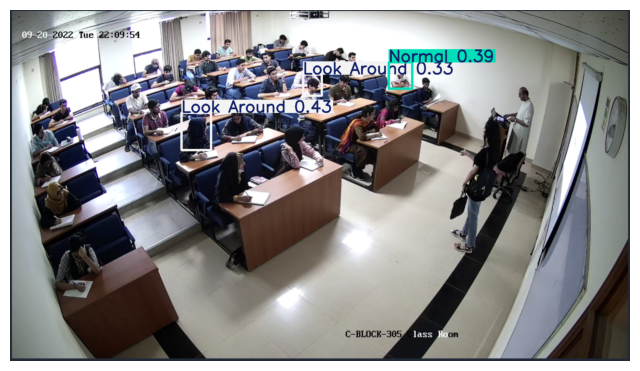

In [42]:
image_path = "/content/Screenshot 2025-04-19 at 21.53.41.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 22.05.18.png: 576x640 1 Look Around, 2 Normals, 1 Stand Up, 26.4ms
Speed: 3.0ms preprocess, 26.4ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


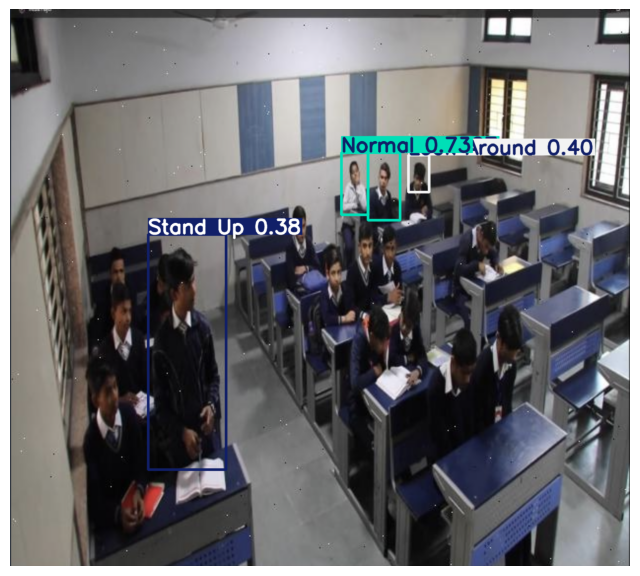

In [48]:
image_path = "/content/Screenshot 2025-04-19 at 22.05.18.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 22.10.19.png: 384x640 2 Bend Over The Desks, 11.8ms
Speed: 2.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


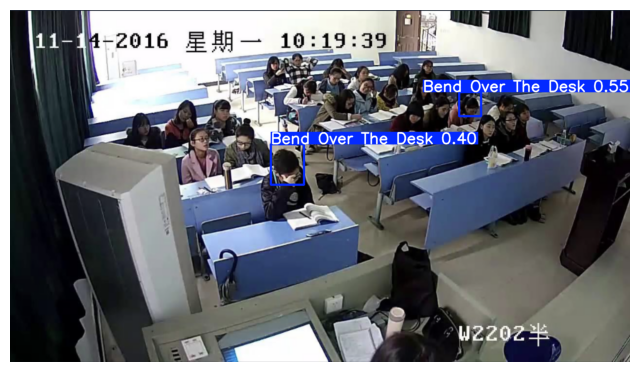

In [52]:
image_path = "/content/Screenshot 2025-04-19 at 22.10.19.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()



image 1/1 /content/Screenshot 2025-04-19 at 22.22.50.png: 384x640 3 Bend Over The Desks, 4 Look Arounds, 1 Wave, 18.6ms
Speed: 3.6ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


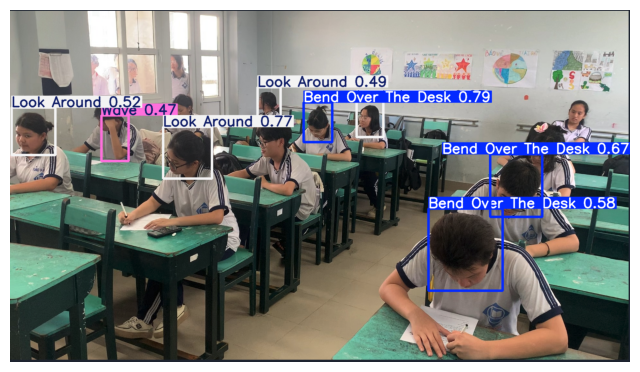

In [56]:
image_path = "/content/Screenshot 2025-04-19 at 22.22.50.png"

results = model_Yolov11s(image_path)

for r in results:
    annotated_img = r.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()


## Evaluation

In [7]:
model = YOLO("/content/drive/MyDrive/detect/yolov11/weights/best.pt")
metrics = model.val()

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 10.6MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1208.9±323.1 MB/s, size: 59.5 KB)



val: Scanning /content/yolov8-2/valid/labels... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<00:00, 904.97it/s]


val: New cache created: /content/yolov8-2/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [03:58<00:00, 14.04s/it]


                   all        264       1524      0.912      0.943      0.955      0.663
    Bend Over The Desk        137        213      0.903      0.911       0.95      0.631
      Hand Under Table        143        278      0.924      0.956      0.945      0.521
           Look Around        168        311       0.89      0.912      0.943      0.606
                Normal        125        499      0.906      0.954      0.965      0.805
              Stand Up         31         93      0.994          1      0.995      0.839
                  Wave         72        130      0.857      0.924      0.933      0.577
Speed: 11.9ms preprocess, 879.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val3


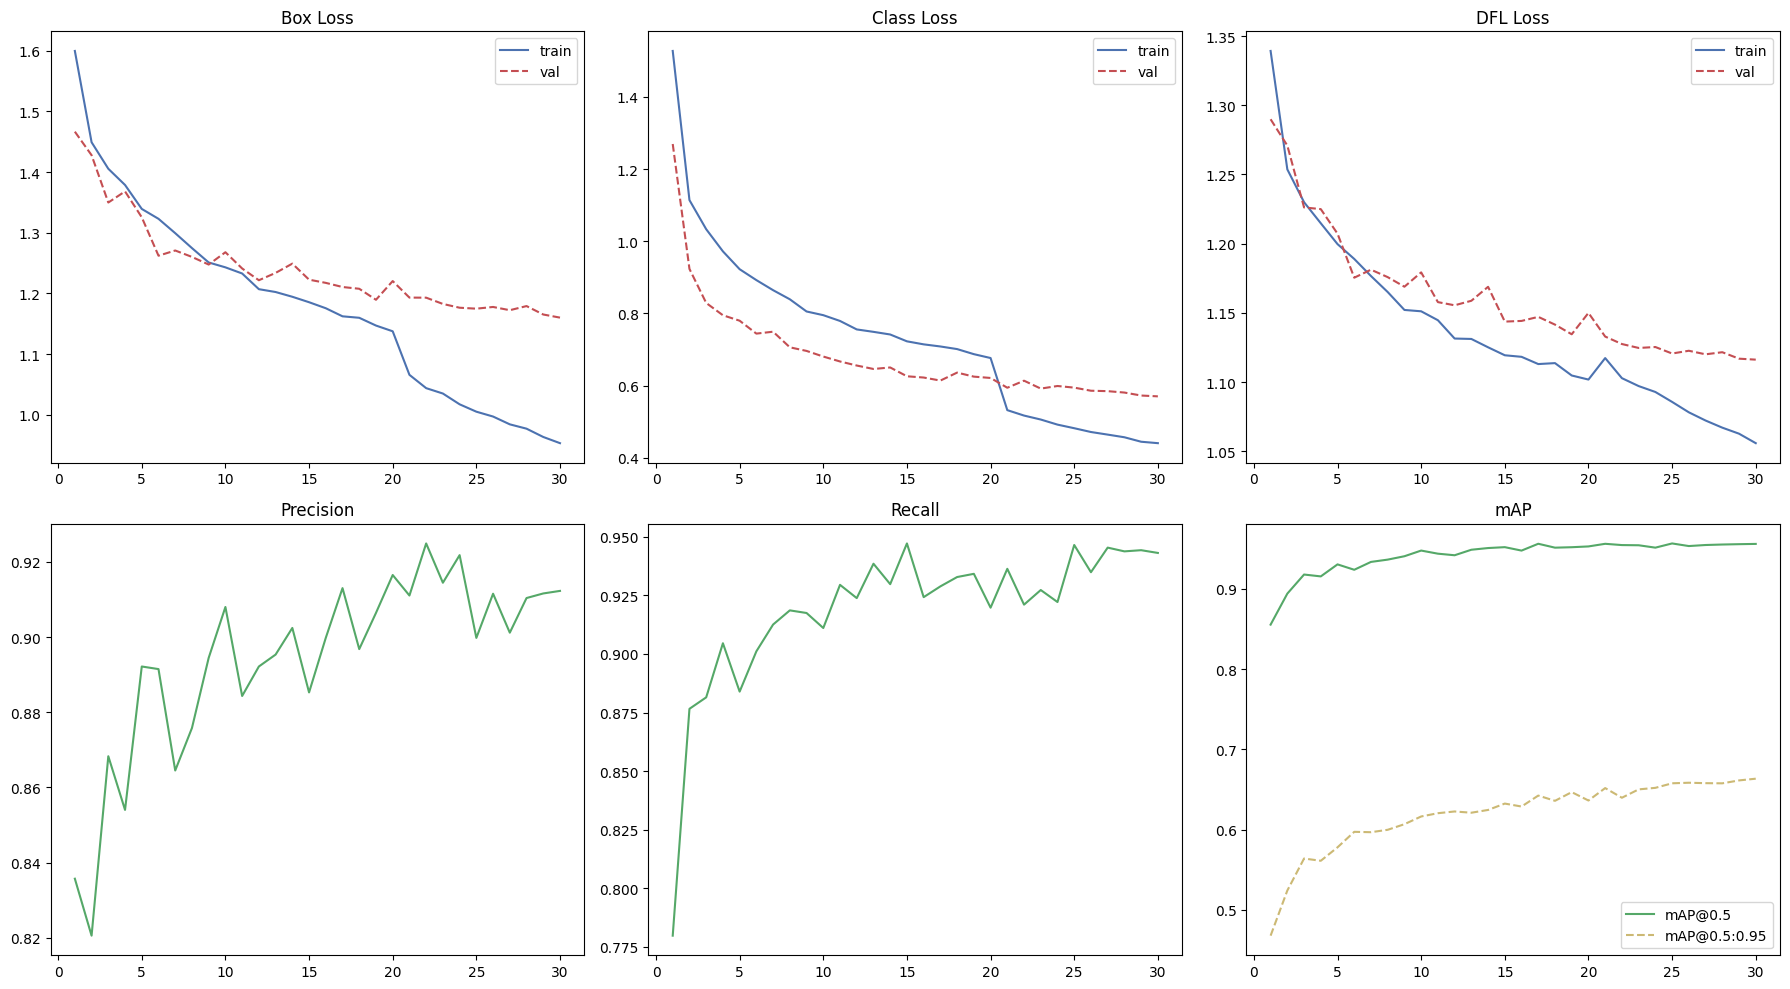

In [20]:
results_csv = pd.read_csv("/content/runs/detect/train2/results.csv")

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

ax[0, 0].plot(results_csv['epoch'], results_csv['train/box_loss'], '-b', label='train')
ax[0, 0].plot(results_csv['epoch'], results_csv['val/box_loss'], '--r', label='val')
ax[0, 0].set_title('Box Loss')
ax[0, 0].legend()

ax[0, 1].plot(results_csv['epoch'], results_csv['train/cls_loss'], '-b', label='train')
ax[0, 1].plot(results_csv['epoch'], results_csv['val/cls_loss'], '--r', label='val')
ax[0, 1].set_title('Class Loss')
ax[0, 1].legend()

ax[0, 2].plot(results_csv['epoch'], results_csv['train/dfl_loss'], '-b', label='train')
ax[0, 2].plot(results_csv['epoch'], results_csv['val/dfl_loss'], '--r', label='val')
ax[0, 2].set_title('DFL Loss')
ax[0, 2].legend()

ax[1, 0].plot(results_csv['epoch'], results_csv['metrics/precision(B)'], '-g')
ax[1, 0].set_title('Precision')

ax[1, 1].plot(results_csv['epoch'], results_csv['metrics/recall(B)'], '-g')
ax[1, 1].set_title('Recall')

ax[1, 2].plot(results_csv['epoch'], results_csv['metrics/mAP50(B)'], '-g', label='mAP@0.5')
ax[1, 2].plot(results_csv['epoch'], results_csv['metrics/mAP50-95(B)'], '--y', label='mAP@0.5:0.95')
ax[1, 2].set_title('mAP')
ax[1, 2].legend()

plt.tight_layout()
plt.show()